
![Moisturiser Image](Manfaat_menggunakan_skincare.jpg)



# This dataset contains information about various skincare Products. Each product is listed with the following attributes:

**product_name**: It shows the main information of the product, including the brand and, in almost all cases, their weight.

**product_url**: A URL linking to the product's webpage for more information or purchase .

**product_type**: The type of product.

**clean_ingreds**: A list of ingredients in the product, including both active and inactive components, such as "glycerin", "sodium hyaluronate", "tocopherol", etc.

**price**: The price of the product, listed in euros.

The dataset includes different products from brands like The Ordinary, CeraVe, and AMELIORATE, with varying sizes, ingredients, and prices. Each product offers a specific formulation, with a focus on moisturising, and some products contain additional benefits like SPF protection.

In [18]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = 10

plt.rc("figure", figsize=(22, 8))

In [19]:
# Load Data from CSV
data = pd.read_csv('skincare_products_clean.csv') 

In [20]:
# Get an overview of the data
print("Data Overview:")
data.head()

Data Overview:


,product_name,product_url,product_type,clean_ingreds,price
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",£5.20
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",£13.00
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",£6.20
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",£22.50
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",£16.00


In [21]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   1138 non-null   object
 1   product_url    1138 non-null   object
 2   product_type   1138 non-null   object
 3   clean_ingreds  1138 non-null   object
 4   price          1138 non-null   object
dtypes: object(5)
memory usage: 44.6+ KB


In [22]:
# Check for missing values
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


product_name     0
product_url      0
product_type     0
clean_ingreds    0
price            0
dtype: int64

In [23]:
# Basic Statistics of numerical columns (e.g., Price)
print("\nBasic Statistics:")
data.describe()


Basic Statistics:


,product_name,product_url,product_type,clean_ingreds,price
count,1138,1138,1138,1138,1138
unique,1138,1126,14,1071,290
top,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/lancome-advanced...,Mask,['sodium chloride'],£22.00
freq,1,4,124,5,33


In [24]:
# Clean the 'price' column by removing non-numeric characters and convert it to float
data['price'] = data['price'].replace({'£': '', ',': ''}, regex=True)  # Remove £ and commas
data['price'] = pd.to_numeric(data['price'], errors='coerce') 

In [25]:
data['clean_ingreds']

0       ['capric triglyceride', 'cetyl alcohol', 'prop...
1       ['homosalate', 'glycerin', 'octocrylene', 'eth...
2       ['sodium hyaluronate', 'sodium hyaluronate', '...
3       ['ammonium lactate', 'c12-15', 'glycerin', 'pr...
4       ['glycerin', 'cetearyl alcohol', 'capric trigl...
                              ...                        
1133    ['prunus amygdalus dulcis', 'tipa-laureth sulf...
1134    ['sodium lauroyl', 'sodium cocoamphoacetate', ...
1135    ['prunus amygdalus dulcis', 'tipa-laureth sulf...
1136    ['capric triglyceride', 'peg-40 sorbitan perol...
1137    ['prunus amygdalus dulcis', 'sesamium indicum ...
Name: clean_ingreds, Length: 1138, dtype: object

In [26]:
# Convert the 'clean_ingreds' column from string to actual list objects
data['clean_ingreds'] = data['clean_ingreds'].apply(ast.literal_eval)  # Safely convert string to list


In [27]:
data['clean_ingreds']

0       [capric triglyceride, cetyl alcohol, propanedi...
1       [homosalate, glycerin, octocrylene, ethylhexyl...
2       [sodium hyaluronate, sodium hyaluronate, panth...
3       [ammonium lactate, c12-15, glycerin, prunus am...
4       [glycerin, cetearyl alcohol, capric triglyceri...
                              ...                        
1133    [prunus amygdalus dulcis, tipa-laureth sulfate...
1134    [sodium lauroyl, sodium cocoamphoacetate, coca...
1135    [prunus amygdalus dulcis, tipa-laureth sulfate...
1136    [capric triglyceride, peg-40 sorbitan peroleat...
1137    [prunus amygdalus dulcis, sesamium indicum see...
Name: clean_ingreds, Length: 1138, dtype: object

In [28]:
# Check for any missing values after conversion
print("\nMissing Values after preprocessing:")
print(data.isnull().sum())



Missing Values after preprocessing:
product_name     0
product_url      0
product_type     0
clean_ingreds    0
price            0
dtype: int64


In [29]:
print(data.dtypes)

product_name      object
product_url       object
product_type      object
clean_ingreds     object
price            float64
dtype: object


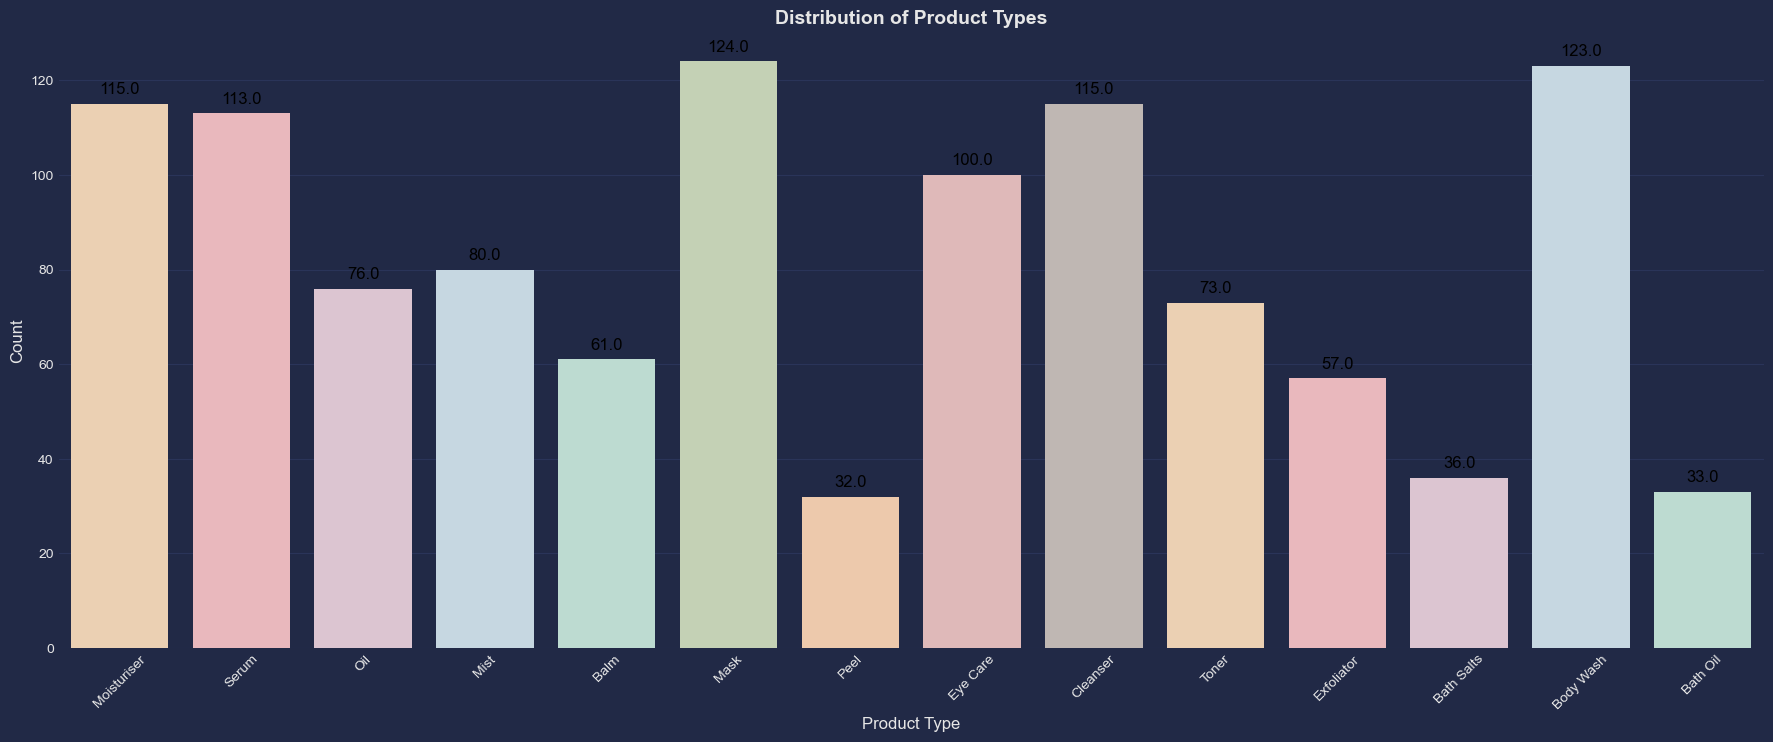

In [34]:
import seaborn as sns

# Custom color palette
custom_palette = ['#f5d0a9', '#f1b0b7', '#e0c1d1', '#c1d8e6', 
                  '#b8e0d2', '#c4d6b0', '#f8c8a1', '#e5b3b3', '#c1b6b1']

# Create figure
ax = sns.countplot(data=data, x='product_type', palette=custom_palette)

# Titles and labels
plt.title('Distribution of Product Types', fontsize=14, fontweight='bold')
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Display values on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Ensure labels are only added to non-zero bars
        ax.annotate(f'{height:,}',  # Adds thousands separator
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

sns.despine()  # Remove top and right spines for a cleaner look
plt.show()



Top 10 Most Common Ingredients:
glycerin: 784
phenoxyethanol: 613
parfum: 579
linalool: 410
limonene: 401
citric acid: 394
disodium edta: 361
tocopherol: 360
butylene glycol: 330
sodium hyaluronate: 313


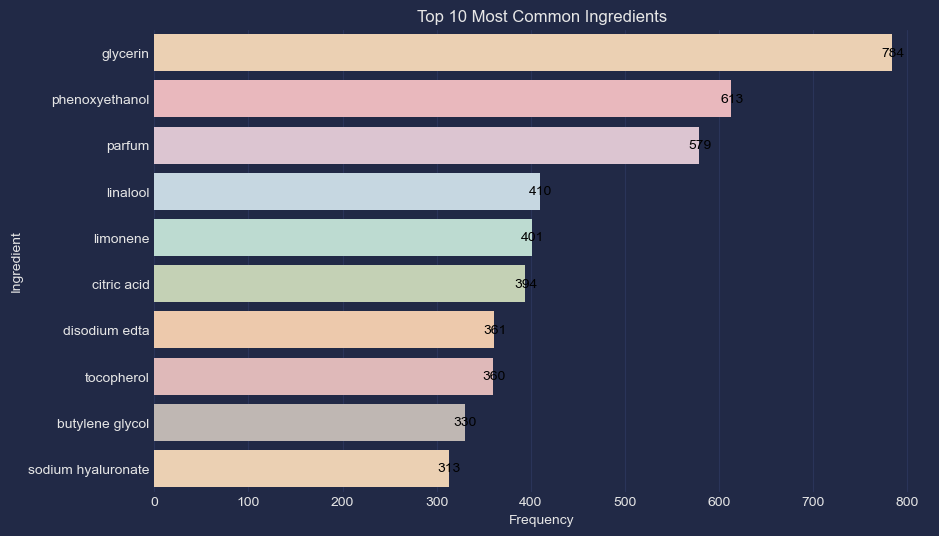

In [32]:
# Ensure that 'clean_ingreds' contains lists, or convert string to list
data['clean_ingreds'] = data['clean_ingreds'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Flatten the list of ingredients
ingredients = data['clean_ingreds'].explode()

# Count frequency of each ingredient
ingredient_counts = Counter(ingredients)

# Show the top 10 most common ingredients
top_10_ingredients = ingredient_counts.most_common(10)
print("\nTop 10 Most Common Ingredients:")
for ingredient, count in top_10_ingredients:
    print(f"{ingredient}: {count}")

# Define your custom color palette
custom_palette = ['#f5d0a9', '#f1b0b7', '#e0c1d1', '#c1d8e6', '#b8e0d2', '#c4d6b0', '#f8c8a1', '#e5b3b3', '#c1b6b1']

# Visualize the top 10 ingredients with the custom color palette
ingredient_df = pd.DataFrame(top_10_ingredients, columns=['Ingredient', 'Frequency'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Frequency', y='Ingredient', data=ingredient_df, palette=custom_palette)

# Annotate each bar with the corresponding frequency
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 0.5, p.get_y() + p.get_height() / 2), 
                ha='center', va='center', fontsize=10, color='black')

plt.title('Top 10 Most Common Ingredients')
plt.show()


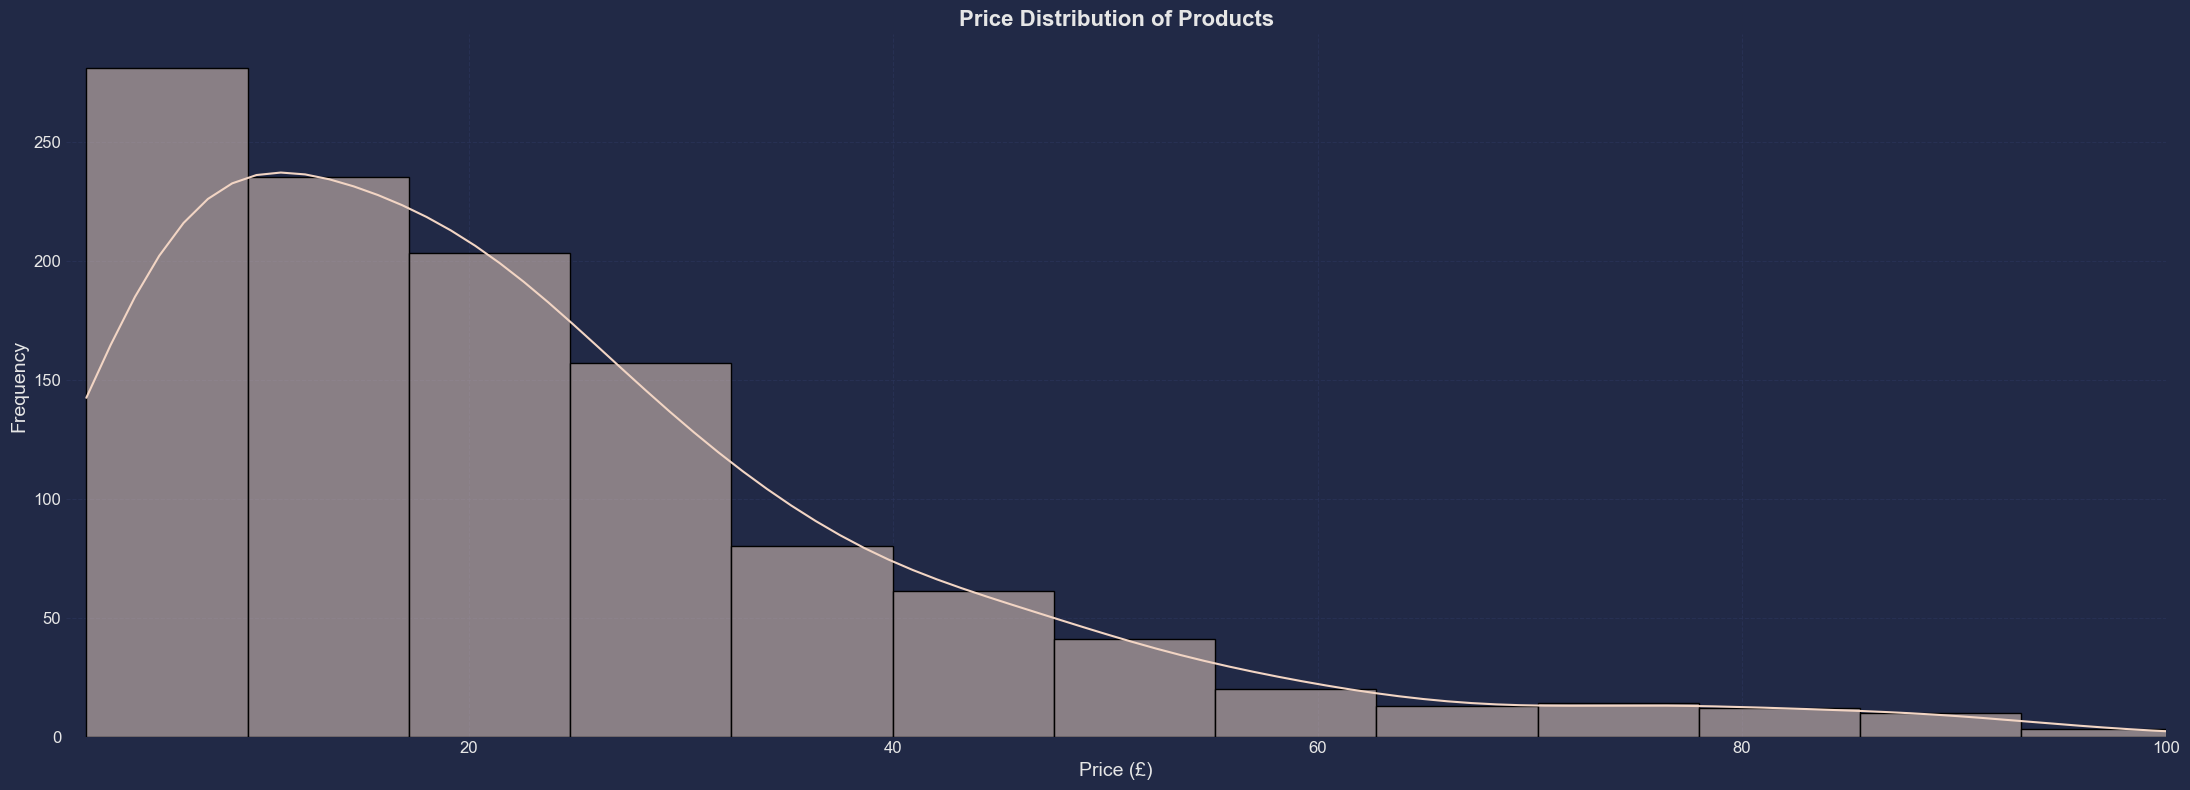

In [37]:
# Plotting the price distribution with a more visually appealing color
sns.histplot(data['price'], kde=True, color='#F2D5C4', bins=30)

# Adding more grid lines to enhance readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding title and labels with larger font sizes for better readability
plt.title('Price Distribution of Products', fontsize=16, fontweight='bold')
plt.xlabel('Price (£)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Making ticks on both axes larger
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting the x-axis range to be between 1 and 100
plt.xlim(1, 100)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [39]:
data['price'].describe()

count    1138.000000
mean       24.021775
std        21.770652
min         1.950000
25%         9.950000
50%        18.925000
75%        31.500000
max       230.000000
Name: price, dtype: float64

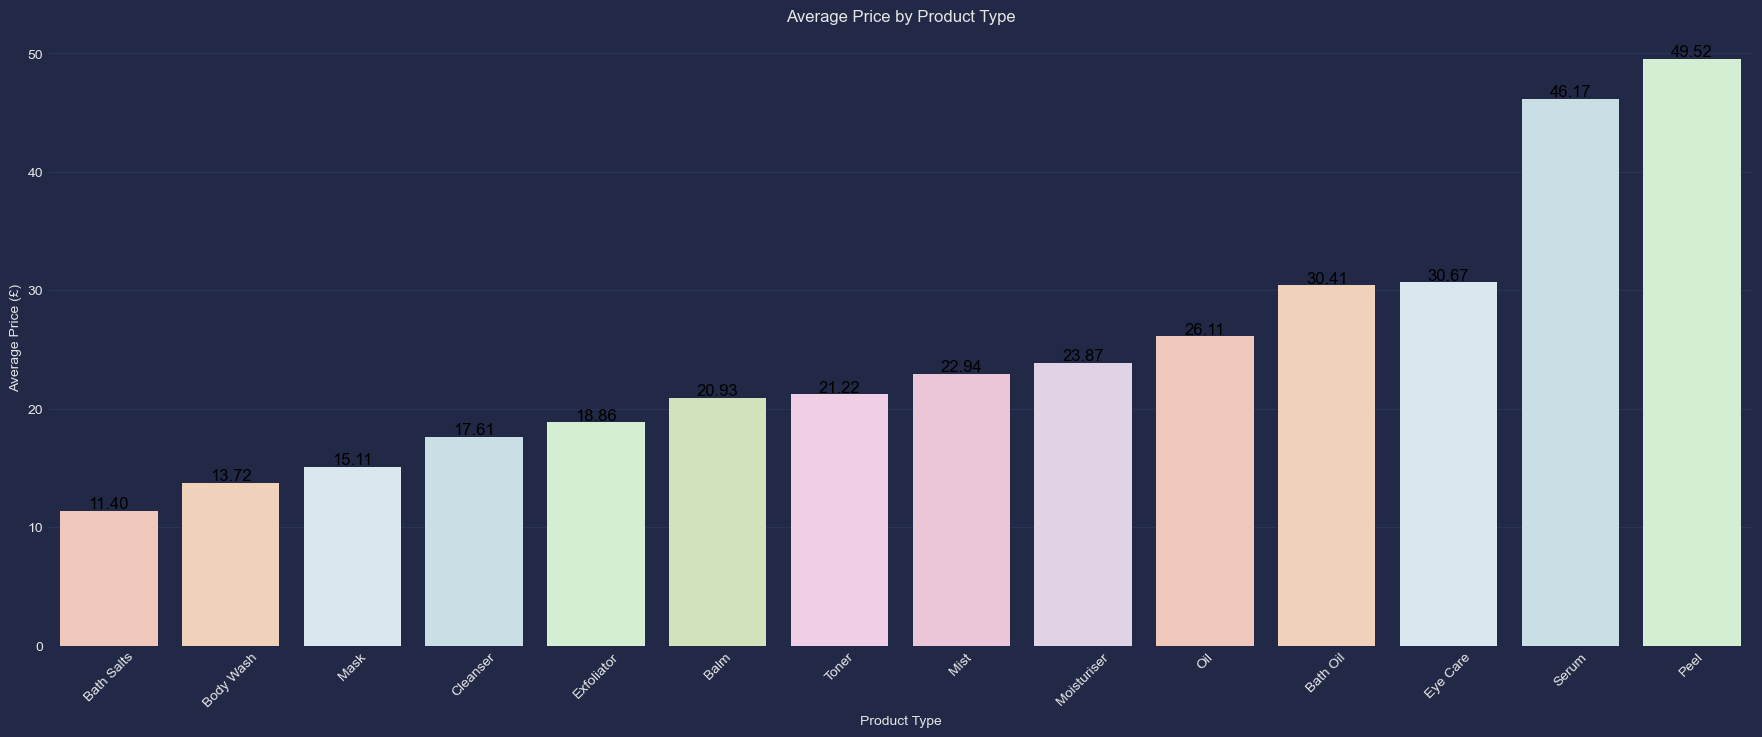

In [41]:
# Sorting the data by average price
sorted_data = data.groupby('product_type')['price'].mean().reset_index()

sorted_data = sorted_data.sort_values('price', ascending=True)  # Change to ascending=True if you want ascending order

custom_palette = ['#f9c2b2', '#f7d2b1', '#d8e8f1', '#c5e2e9', '#d0f2d0', '#d3e9b6', '#f6c9e6', '#f0c1d8', '#e0d0e8']


ax = sns.barplot(x='product_type', y='price', data=sorted_data, palette=custom_palette, ci=None)

# Adding the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Average Price by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.show()


In [42]:
# Customizing the price categories more specifically based on price distribution
data['price_category'] = pd.cut(data['price'], 
                                bins=[0, 10, 30, 60, 100, float('inf')],
                                labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Display the first few rows to verify
print(data[['price', 'price_category']].head())



   price price_category
0    5.2       Very Low
1   13.0            Low
2    6.2       Very Low
3   22.5            Low
4   16.0            Low


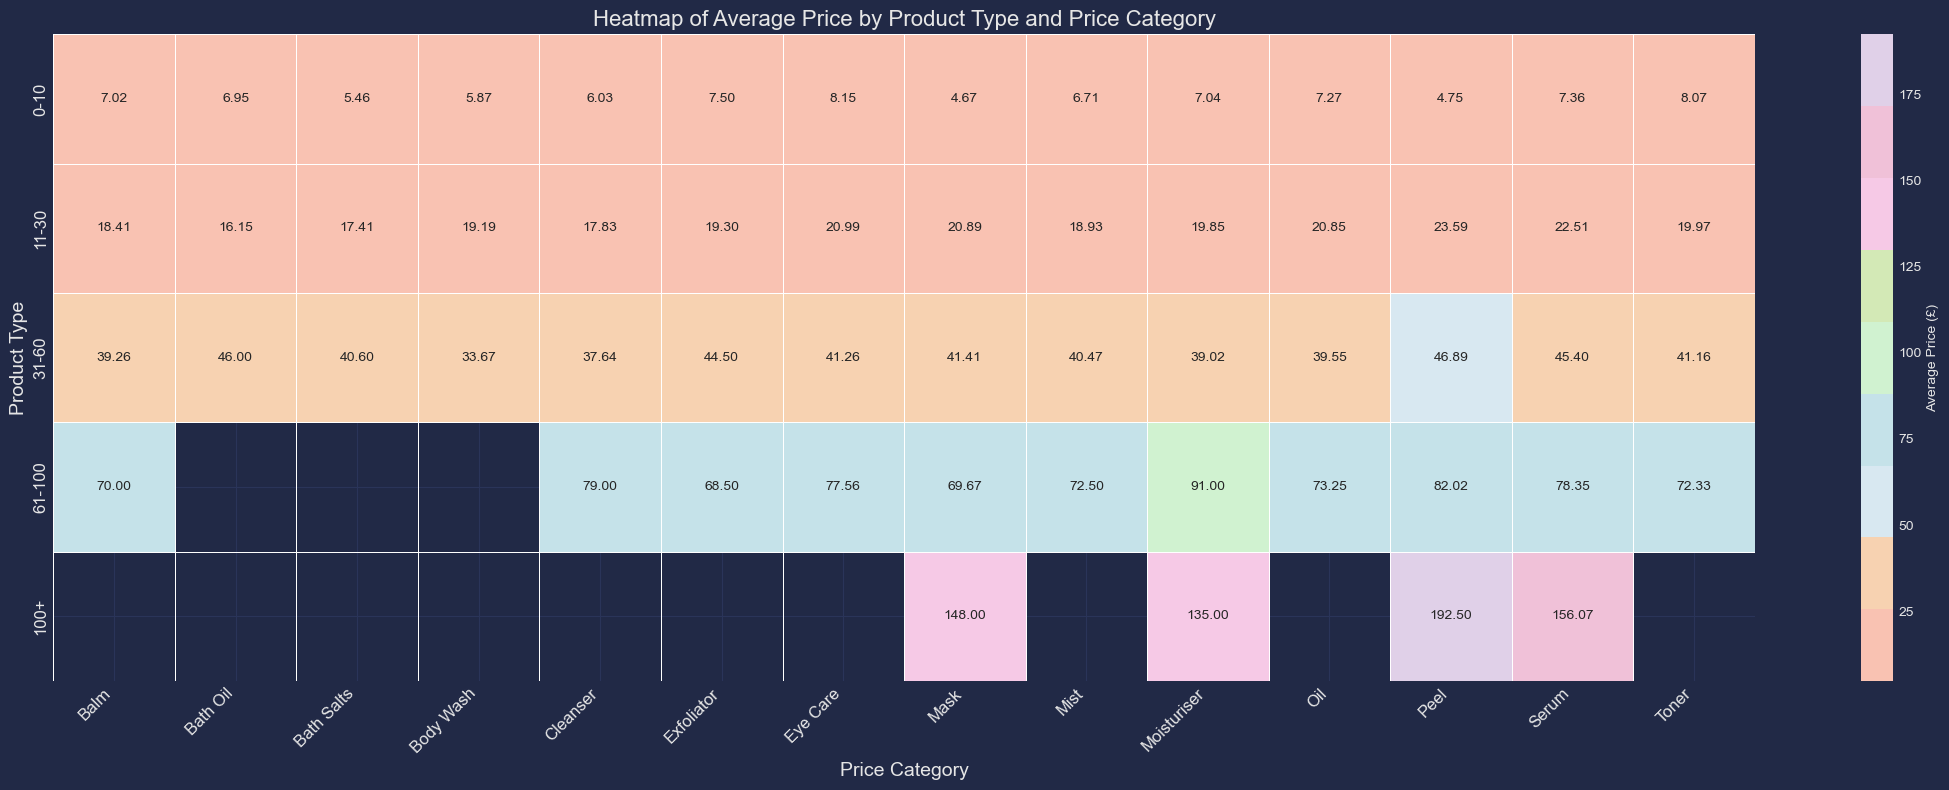

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Adding 'price_category' column with explicit price ranges
data['price_category'] = pd.cut(data['price'], 
                                bins=[0, 10, 30, 60, 100, float('inf')],
                                labels=['0-10', '11-30', '31-60', '61-100', '100+'])

custom_palette = ['#f9c2b2', '#f7d2b1', '#d8e8f1', '#c5e2e9', '#d0f2d0', '#d3e9b6', '#f6c9e6', '#f0c1d8', '#e0d0e8']
# Create a pivot table to represent the average price per product_type and price_category
pivot_data = data.pivot_table(values='price', index='price_category', columns='product_type', aggfunc='mean')

# Sort the product types alphabetically or by price range if needed
pivot_data = pivot_data.sort_index(ascending=True)

# Plot the heatmap
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap=sns.color_palette(custom_palette), linewidths=0.5, cbar_kws={'label': 'Average Price (£)'})
plt.title('Heatmap of Average Price by Product Type and Price Category', fontsize=16)
plt.xlabel('Price Category', fontsize=14)
plt.ylabel('Product Type', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


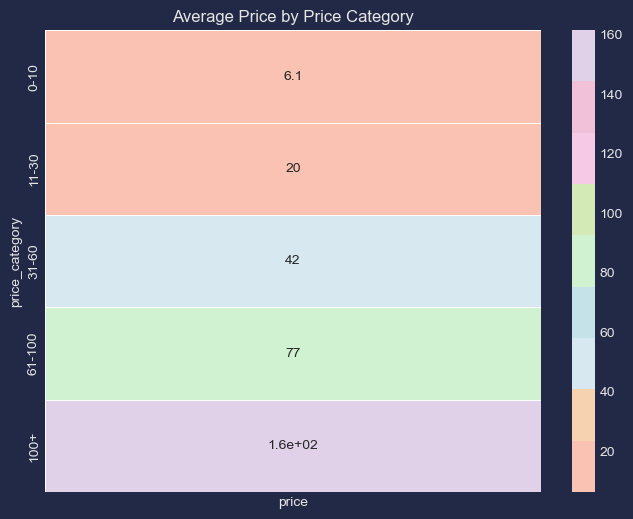

In [44]:
# Create a pivot table to show average prices by category
pivot_data = data.pivot_table(values='price', index='price_category', aggfunc='mean')

custom_palette = ['#f9c2b2', '#f7d2b1', '#d8e8f1', '#c5e2e9', '#d0f2d0', '#d3e9b6', '#f6c9e6', '#f0c1d8', '#e0d0e8']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap=sns.color_palette(custom_palette), linewidths=0.5)
plt.title('Average Price by Price Category')
plt.show()
